In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy.stats
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

from scipy.stats import shapiro

In [2]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from statsmodels.api import qqplot, add_constant
from statsmodels.formula.api import ols

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV


In [14]:
# 로지스틱 회귀
from statsmodels.api import Logit

# 평가 함수
from sklearn.metrics import accuracy_score

# confusion matrix
from sklearn.metrics import confusion_matrix

# 분류 Decision Tree
from sklearn.tree import DecisionTreeClassifier


In [5]:
plt.rc('font', family='Malgun Gothic')

# =============================================

# customer_merge_Category 로지스틱 회수

In [6]:
# customer_merge_Category 데이터 불러오기

df_nocustomer = pd.read_csv("0427_member_isbuy_new.csv", engine='python', encoding="utf-8")
df_nocustomer.head()

,Unnamed: 0,ID,나이,성별,유입경로,유입기기,회원구분,구매여부,주소(동/읍/면),AgeGroup
0,0,cgh1385,53,남자,블로그광고,모바일,일반,1,전라북도,50-55
1,1,pjkl77,28,남자,이메일광고,PC,사업자,1,전라북도,25-30
2,2,bear011,40,남자,SNS광고,모바일,사업자,1,경기도,40-45
3,3,kim0750,44,남자,SNS광고,PC,사업자,1,경상북도,40-45
4,4,nonane9979,45,남자,블로그광고,PC,사업자,1,부산광역시,45-50


In [7]:
# 'Unnamed: 0' 열 제거

df_nocustomer = df_nocustomer.drop('Unnamed: 0', axis=1)
df_nocustomer = df_nocustomer.drop('ID', axis=1)
df_nocustomer = df_nocustomer.drop('나이', axis=1)
df_nocustomer

,성별,유입경로,유입기기,회원구분,구매여부,주소(동/읍/면),AgeGroup
0,남자,블로그광고,모바일,일반,1,전라북도,50-55
1,남자,이메일광고,PC,사업자,1,전라북도,25-30
2,남자,SNS광고,모바일,사업자,1,경기도,40-45
3,남자,SNS광고,PC,사업자,1,경상북도,40-45
4,남자,블로그광고,PC,사업자,1,부산광역시,45-50
...,...,...,...,...,...,...,...
6570,남자,전단지광고,PC,일반,0,강원도,45-50
6571,남자,블로그광고,PC,일반,0,-,45-50
6572,남자,전단지광고,PC,일반,0,경상북도,45-50
6573,남자,인터넷검색,모바일,일반,0,경상남도,45-50


In [8]:
df_nocustomer.columns

Index(['성별', '유입경로', '유입기기', '회원구분', '구매여부', '주소(동/읍/면)', 'AgeGroup'], dtype='object')

In [9]:
df_nocustomer.rename(columns={'주소(동/읍/면)':'주소'}, inplace=True)

# --------------------------------------------------------------------------------

In [49]:
# 더미

df_nocustomer_dummy_r = pd.get_dummies(df_nocustomer)
df_nocustomer_dummy_r

,구매여부,성별_남자,성별_여자,유입경로_SNS광고,유입경로_기타,유입경로_블로그광고,유입경로_신문광고,유입경로_유튜브광고,유입경로_이메일광고,유입경로_인터넷검색,...,AgeGroup_45-50,AgeGroup_50-55,AgeGroup_55-60,AgeGroup_60-65,AgeGroup_65-70,AgeGroup_70-75,AgeGroup_75-80,AgeGroup_80-85,AgeGroup_85-90,AgeGroup_90-95
0,1,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6570,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6571,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6572,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6573,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [53]:
df_nocustomer_dummy_r.columns

Index(['구매여부', '성별_남자', '성별_여자', '유입경로_SNS광고', '유입경로_기타', '유입경로_블로그광고',
       '유입경로_신문광고', '유입경로_유튜브광고', '유입경로_이메일광고', '유입경로_인터넷검색', '유입경로_인터넷기사광고',
       '유입경로_잡지광고', '유입경로_전단지광고', '유입경로_지인추천', '유입경로_카카오톡광고', '유입기기_PC',
       '유입기기_모바일', '회원구분_VIP', '회원구분_관리자', '회원구분_딜러', '회원구분_딜러 유치 회원',
       '회원구분_사업자', '회원구분_사업자(수신거부)', '회원구분_일반', '회원구분_일반(수신거부)',
       '회원구분_전화주문 고객', '회원구분_특별회원', '주소_-', '주소_강원도', '주소_경기도', '주소_경상남도',
       '주소_경상북도', '주소_광주광역시', '주소_대구광역시', '주소_대전광역시', '주소_부산광역시', '주소_서울특별시',
       '주소_세종특별자치시', '주소_오프라인', '주소_울산광역시', '주소_인천광역시', '주소_전라남도', '주소_전라북도',
       '주소_제주특별자치도', '주소_충청남도', '주소_충청북도', 'AgeGroup_20-25', 'AgeGroup_25-30',
       'AgeGroup_30-35', 'AgeGroup_35-40', 'AgeGroup_40-45', 'AgeGroup_45-50',
       'AgeGroup_50-55', 'AgeGroup_55-60', 'AgeGroup_60-65', 'AgeGroup_65-70',
       'AgeGroup_70-75', 'AgeGroup_75-80', 'AgeGroup_80-85', 'AgeGroup_85-90',
       'AgeGroup_90-95'],
      dtype='object')

# ---------------------------------------------------------------------------

데이터 전처리 = 데이터 분할 (7:3)

In [74]:
# 처음 불러온 파일 그대로 데이터 분할

df_train_r, df_test_r = train_test_split(df_nocustomer, test_size=0.3, random_state=1234)
print("train data size : {}".format(df_train_r.shape))
print("test data seze : {}".format(df_test_r.shape))

train data size : (4602, 7)
test data seze : (1973, 7)


In [75]:
# 더미 된걸로 데이터 분할

df_train_dr, df_test_dr = train_test_split(df_nocustomer_dummy_r, test_size=0.3, random_state=1234)
print("train data size : {}".format(df_train_dr.shape))
print("test data seze : {}".format(df_test_dr.shape))

train data size : (4602, 61)
test data seze : (1973, 61)


In [55]:
# inf ?????

import math
x = float('inf')
math.isinf(x)

True

In [59]:
df_nocustomer_dummy_r.replace(np.inf, 0)

,구매여부,성별_남자,성별_여자,유입경로_SNS광고,유입경로_기타,유입경로_블로그광고,유입경로_신문광고,유입경로_유튜브광고,유입경로_이메일광고,유입경로_인터넷검색,...,AgeGroup_45-50,AgeGroup_50-55,AgeGroup_55-60,AgeGroup_60-65,AgeGroup_65-70,AgeGroup_70-75,AgeGroup_75-80,AgeGroup_80-85,AgeGroup_85-90,AgeGroup_90-95
0,1,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6570,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6571,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6572,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6573,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
df_nocustomer[df_nocustomer['AgeGroup'] == 'inf']

In [45]:
df_nocustomer.isnull().sum()

성별          0
유입경로        0
유입기기        0
회원구분        0
구매여부        0
주소          0
AgeGroup    0
dtype: int64

# -------------------------------------------------------------------

모델 및 회귀계수 검토

In [77]:
# 1

log_model_1 = Logit.from_formula("""구매여부 ~ C(성별) + C(유입경로) + C(유입기기) + C(회원구분) + C(주소) + C(AgeGroup)""", df_train_r)
log_result_1 = log_model_1.fit()
print(log_result.summary())

         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

In [78]:
# 2 (더미변수)

log_model_2 = Logit.from_formula("""구매여부 ~ 성별_남자 + 성별_여자 + 유입경로_SNS광고 + 유입경로_기타 + 유입경로_블로그광고 +
       유입경로_신문광고 + 유입경로_유튜브광고 + 유입경로_이메일광고 + 유입경로_인터넷검색 + 유입경로_인터넷기사광고 +
       유입경로_잡지광고 + 유입경로_전단지광고 + 유입경로_지인추천 + 유입경로_카카오톡광고 + 유입기기_PC +
       유입기기_모바일 + 회원구분_VIP + 회원구분_관리자 + 회원구분_딜러 + 회원구분_딜러 유치 회원 +
       회원구분_사업자 + 회원구분_사업자(수신거부) + 회원구분_일반 + 회원구분_일반(수신거부) +
       회원구분_전화주문 고객 + 회원구분_특별회원 + 주소_- + 주소_강원도 + 주소_경기도 + 주소_경상남도 +
       주소_경상북도 + 주소_광주광역시 + 주소_대구광역시 + 주소_대전광역시 + 주소_부산광역시 + 주소_서울특별시 +
       주소_세종특별자치시 + 주소_오프라인 + 주소_울산광역시 + 주소_인천광역시 + 주소_전라남도 + 주소_전라북도 +
       주소_제주특별자치도 + 주소_충청남도 + 주소_충청북도 + AgeGroup_20-25 + AgeGroup_25-30 +
       AgeGroup_30-35 + AgeGroup_35-40 + AgeGroup_40-45 + AgeGroup_45-50 +
       AgeGroup_50-55 + AgeGroup_55-60 + AgeGroup_60-65 + AgeGroup_65-70 +
       AgeGroup_70-75 + AgeGroup_75-80 + AgeGroup_80-85 + AgeGroup_85-90 +
       C(AgeGroup_90-95)""", df_train_dr)
log_result_2 = log_model.fit()
print(log_result.summary())

PatsyError: numbers besides '0' and '1' are only allowed with **
    구매여부 ~ 성별_남자 + 성별_여자 + 유입경로_SNS광고 + 유입경로_기타 + 유입경로_블로그광고 +        유입경로_신문광고 + 유입경로_유튜브광고 + 유입경로_이메일광고 + 유입경로_인터넷검색 + 유입경로_인터넷기사광고 +        유입경로_잡지광고 + 유입경로_전단지광고 + 유입경로_지인추천 + 유입경로_카카오톡광고 + 유입기기_PC +        유입기기_모바일 + 회원구분_VIP + 회원구분_관리자 + 회원구분_딜러 + 회원구분_딜러 유치 회원 +        회원구분_사업자 + 회원구분_사업자(수신거부) + 회원구분_일반 + 회원구분_일반(수신거부) +        회원구분_전화주문 고객 + 회원구분_특별회원 + 주소_- + 주소_강원도 + 주소_경기도 + 주소_경상남도 +        주소_경상북도 + 주소_광주광역시 + 주소_대구광역시 + 주소_대전광역시 + 주소_부산광역시 + 주소_서울특별시 +        주소_세종특별자치시 + 주소_오프라인 + 주소_울산광역시 + 주소_인천광역시 + 주소_전라남도 + 주소_전라북도 +        주소_제주특별자치도 + 주소_충청남도 + 주소_충청북도 + AgeGroup_20-25 + AgeGroup_25-30 +        AgeGroup_30-35 + AgeGroup_35-40 + AgeGroup_40-45 + AgeGroup_45-50 +        AgeGroup_50-55 + AgeGroup_55-60 + AgeGroup_60-65 + AgeGroup_65-70 +        AgeGroup_70-75 + AgeGroup_75-80 + AgeGroup_80-85 + AgeGroup_85-90 +        C(AgeGroup_90-95)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    ^^

In [ ]:
... df_nocustomer(df_train_r) / df_nocustomer_dummy_r(df_train_dr) 둘다 모델이 안 돌려짐ㅜㅜ

예측 및 성능 평가

In [ ]:
# 예측

y_pred = log_result.predict(df_test_r)
y_pred_class = (y_pred > 0.5).astype(int)
y_pred_class.head()

In [ ]:
# 평가

print("Accuracy: {0:.3f}\n".format(accuracy_score(df_test_r["구매여부"], y_pred_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test_r["구매여부"], y_pred_class)))

결론도출

In [ ]:
# 최종 회귀식

df_logistix_coef = pd.DataFrame({"Coef":log_result.params.values[1:]}, index=log_model.exog_names[1:])
df_logistix_coef.plot.barh(y="Coef")

In [ ]:
# 표준화 회귀 계수

df_char = df_nocustomer.select_dtypes(include="object")
df_numeric = df_nocustomer.select_dtypes(exclude="object")

scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns=df_numeric.columns)

df_scaled = pd.concat([df_numeric_scaled, df_char], axis=1)
df_scaled.head()

In [ ]:
df_scaled["구매여부"] = np.where(df_scaled["BAD"]>0,1,0)
df_scaled.head()

In [ ]:
df_scaled_train, df_scaled_test = train_test_split(df_scaled, test_size=0.3, random_state=1234)

In [ ]:
scaled_log_model = Logit.from_formula("""구매여부 ~ C(성별) + C(유입경로) + C(유입기기) + C(회원구분) + C(주소) + C(AgeGroup)""", df_scaled_train)

scaled_log_result = scaled_log_model.fit()
print(scaled_log_result.summary())

In [ ]:
df_log_scaled_coef = pd.DataFrame({"Coef":scaled_log_result.params.values[1:]}, index = scaled_log_model.exog_names[1:])
df_log_scaled_coef.plot.barh(y="Coef", legend=False)

# =====================================

# customer_merge_Category 의사결정나무

In [10]:
# 더미

df_nocustomer_dummy = pd.get_dummies(df_nocustomer)
df_nocustomer_dummy.head()

,구매여부,성별_남자,성별_여자,유입경로_SNS광고,유입경로_기타,유입경로_블로그광고,유입경로_신문광고,유입경로_유튜브광고,유입경로_이메일광고,유입경로_인터넷검색,...,AgeGroup_45-50,AgeGroup_50-55,AgeGroup_55-60,AgeGroup_60-65,AgeGroup_65-70,AgeGroup_70-75,AgeGroup_75-80,AgeGroup_80-85,AgeGroup_85-90,AgeGroup_90-95
0,1,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [11]:
df_tree_y = df_nocustomer_dummy["구매여부"]
df_tree_x =df_nocustomer_dummy.drop("구매여부", axis=1, inplace=False)

데이터 전처리 = 데이터 분할 (7:3)

In [12]:
df_tree_train_x, df_tree_test_x, df_tree_train_y, df_tree_test_y = train_test_split(df_tree_x, df_tree_y, test_size=0.3, random_state=1234)

print("train data X size : {}".format(df_tree_train_x.shape))
print("train data Y size : {}".format(df_tree_train_y.shape))
print("test data X size : {}".format(df_tree_test_x.shape))
print("test data Y size : {}".format(df_tree_test_y.shape))

train data X size : (4602, 60)
train data Y size : (4602,)
test data X size : (1973, 60)
test data Y size : (1973,)


트리 모델 생성

In [15]:
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_tree_train_x, df_tree_train_y)

print("Accuracy on training set: {:.3f}".format(tree_uncustomized.score(df_tree_train_x, df_tree_train_y)))
print("Accuracy on test set: {:.3f}".format(tree_uncustomized.score(df_tree_train_x,df_tree_train_y)))

Accuracy on training set: 0.909
Accuracy on test set: 0.909


In [16]:
tree_uncustomized

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1234, splitter='best')

In [19]:
train_accuracy = []
test_accuracy = []

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth=v_max_depth, random_state=1234)
    tree.fit(df_tree_train_x, df_tree_train_y)
    train_accuracy.append(tree.score(df_tree_train_x,df_tree_train_y))
    test_accuracy.append(tree.score(df_tree_test_x,df_tree_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.830,0.814
1,2,0.830,0.814
2,3,0.861,0.834
3,4,0.864,0.837
4,5,0.866,0.838
5,6,0.869,0.838
6,7,0.870,0.837
7,8,0.874,0.837
8,9,0.879,0.834
9,10,0.882,0.832


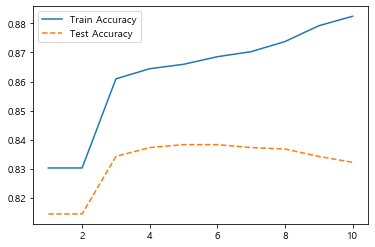

In [20]:
plt.plot(para_depth, train_accuracy, linestyle="-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle="--", label = "Test Accuracy")
plt.legend()

In [37]:
v_feature_name_t = df_tree_train_x.columns

In [27]:
train_accuracy = []
test_accuracy = []

para_split = [n_split * 10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split=v_min_samples_split, max_depth=4, random_state=1234)
    tree.fit(df_tree_train_x, df_tree_train_y)
    train_accuracy.append(tree.score(df_tree_train_x,df_tree_train_y))
    test_accuracy.append(tree.score(df_tree_test_x,df_tree_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.864,0.837
1,20,0.864,0.837
2,30,0.864,0.837
3,40,0.864,0.837
4,50,0.864,0.837
5,60,0.864,0.837
6,70,0.864,0.837
7,80,0.864,0.837
8,90,0.864,0.837
9,100,0.864,0.837


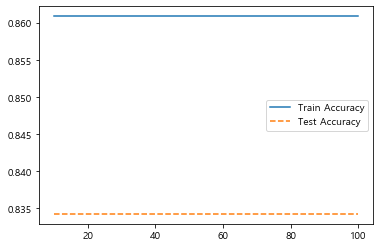

In [26]:
plt.plot(para_split, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle="--", label="Test Accuracy")
plt.legend()

In [28]:
train_accuracy = []
test_accuracy = []

para_leaf = [n_leaf * 2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf=v_min_samples_leaf, min_samples_split=100, max_depth=4, random_state=1234)
    tree.fit(df_tree_train_x, df_tree_train_y)
    train_accuracy.append(tree.score(df_tree_train_x,df_tree_train_y))
    test_accuracy.append(tree.score(df_tree_test_x,df_tree_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

df_accuracy_leaf.round(3)

,MinSamplesLeaf
0,2
1,4
2,6
3,8
4,10
5,12
6,14
7,16
8,18
9,20


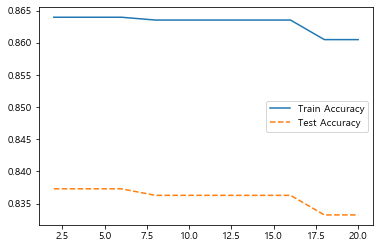

In [29]:
plt.plot(para_leaf, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle="--", label="Test Accuracy")
plt.legend()

In [31]:
tree_final = DecisionTreeClassifier(max_depth=4, min_samples_split=100, min_samples_leaf=6, random_state=1234)
tree_final.fit(df_tree_train_x,df_tree_train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1234, splitter='best')

In [33]:
y_pred = tree_final.predict(df_tree_test_x)
print("Accuracy: {0:.3f}\n".format(tree_final.score(df_tree_test_x, df_tree_test_y)))
print("Confusio matrix: \n{}".format(confusion_matrix(df_tree_test_y, y_pred)))

Accuracy: 0.837

Confusio matrix: 
[[ 303  202]
 [ 119 1349]]


In [38]:
df_importance_t = pd.DataFrame()
df_importance_t["Feature"] = v_feature_name_t
df_importance_t["Importance"] = tree_final.feature_importances_

df_importance_t.sort_values("Importance", ascending = False, inplace=True)
df_importance_t.round(3)

,Feature,Importance
26,주소_-,0.529
50,AgeGroup_45-50,0.283
22,회원구분_일반,0.130
2,유입경로_SNS광고,0.035
24,회원구분_전화주문 고객,0.012
51,AgeGroup_50-55,0.006
18,회원구분_딜러,0.006
0,성별_남자,0.000
42,주소_제주특별자치도,0.000
41,주소_전라북도,0.000


In [ ]:
주소를.. 빼야하나..?

# ====================================